<a href="https://colab.research.google.com/github/Ash100/CADD_Project/blob/main/Explore_KLIFS_in_Kinase_Research_Part_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usage and Importance of **K**inase-**L**igand **I**nteraction **F**ingerprints and **S**tructures database (KLIFS)

My name is **Dr. Ashfaq Ahmad** and you can watch complete tutorial of this notebook on [**Bioinformatics Insights**](https://www.youtube.com/channel/UC2Z_WaqTjbvXGGQNpIF9nAg). This talktorial is inspired from TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects. Majority of scripts are modified or changed accordingly.

Authors:

- Dominique Sydow, 2019-2020, [Volkamer lab, Charité](https://volkamerlab.org/)
- Jaime Rodríguez-Guerra, 2019-2020, [Volkamer lab, Charité](https://volkamerlab.org/)
- David Schaller, 2020, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

[KLIFS](https://klifs.net/) is a database for kinase-ligand interaction fingerprints and structures. In this talktorial, we will use the programmatic access to this database (KLIFS OpenAPI) and the `opencadd` ([GitHub](https://github.com/volkamerlab/opencadd)) package to interact with its rich content.
First, we will use a query kinase ([EGFR](https://www.uniprot.org/uniprot/P00533)) to fetch all available protein structures and explore their bound ligands as well as interaction fingerprints. Then, we will explore the bioactivity data for the EGFR inhibitor [Gefitinib](https://pubchem.ncbi.nlm.nih.gov/compound/Gefitinib) in order to find off-targets. Last but not least, we offer a convenience function that allows to easily explore different kinases.

### References

* Introduction to protein kinases and inhibition ([Chapter 9 in _Med. Chem. Anticancer Drugs_ (2008), 251-305](https://www.sciencedirect.com/science/article/pii/B9780444528247000093))
* Kinase classification by Manning _et al._ ([_Science_ (2002), __298__, 1912-1934](https://pubmed.ncbi.nlm.nih.gov/12471243/))
* Kinase-centric computational drug development ([_Annu. Rep. Med. Chem._ (2017), __50__, 197-236](https://www.sciencedirect.com/science/article/pii/S0065774317300040?via%3Dihub))
* EGFR and Gefitinib
  * Review on the EGFR family ([_Pharmacol. Res._ (2019), __139__, 395-411](https://www.sciencedirect.com/science/article/abs/pii/S104366181831747X?via%3Dihub) and [_Front. Cell Dev. Biol._ (2016), __8__](https://www.frontiersin.org/articles/10.3389/fcell.2016.00088/full))
  * EGFR kinase details on [UniProt](https://www.uniprot.org/uniprot/P00533)
  * Gefitinib details on [PubChem](https://pubchem.ncbi.nlm.nih.gov/compound/Gefitinib)
* KLIFS - a kinase-inhibitor interactions database
   * Main database/website reference ([_Nucleic Acids Res._ (2020)](https://academic.oup.com/nar/advance-article/doi/10.1093/nar/gkaa895/5934416))
   * Introduction of the KLIFS website & database ([_Nucleic Acids Res._ (2016), __44__, 6, D365–D371](https://doi.org/10.1093/nar/gkv1082))
   * Initial KLIFS dataset, binding mode classification, residue numbering ([_J. Med. Chem._ (2014), __57__, 2, 249-277](https://pubs.acs.org/doi/abs/10.1021/jm400378w))
* NGLView, the interactive molecule visualizer ([_Bioinformatics_ (2018), __34__, 1241–124](https://doi.org/10.1093/bioinformatics/btx789))

## Theory

### Kinases

Protein kinases are one of the most important and well-studied drug targets, since they are critical to most aspects of cell life. Their dysregulation causes many diseases such as cancer, inflammation, and autoimmune disorders.

Protein kinases catalyze the phosphorylation of tyrosine, serine, threonine and histidine residues of themselves or other kinases ([_Med. Chem. Anticancer Drugs_ (2008), 251-305](https://www.sciencedirect.com/science/article/pii/B9780444528247000093)).
There are 518 protein kinases encoded in the human genome, which were clustered based on their sequence into eight main kinase groups (AGC, CAMK, CK1, CMGC, STE, TK, TKL and Other) in the famous Manning tree ([_Science_ (2002), __298__, 1912-1934](https://pubmed.ncbi.nlm.nih.gov/12471243/)). Each kinase group is further categorized into different kinase families.
Since all kinases bind ATP, their binding sites are highly conserved regarding their sequence and structure, making them difficult drug targets when it comes to the development of selective drugs.

Since this protein class is so well-studied, the amount of available data is growing more and more, allowing and requiring infrastructures that organize, analyze, and provide this data to facilitate kinase-centric drug development ([_Annu. Rep. Med. Chem._ (2017), __50__, 197-236](https://www.sciencedirect.com/science/article/pii/S0065774317300040?via%3Dihub)). One of these rich resources is the [KLIFS](https://klifs.net/) database, which will be used in this talktorial.

### EGFR and Gefitinib

The [epidermal growth factor receptor (EGFR)](https://www.uniprot.org/uniprot/P00533) is a member of the EGFR (ErbB) family of receptors, which consists of four closely related receptor tyrosine kinases: EGFR (ErbB1), HER2/neu (ErbB2), Her3 (ErbB3) and Her4 (ErbB4).
EGFR was the first receptor for which a relationship between mutations, over-expression and cancer has been shown. Interrupting EGFR signaling by blocking the EGFR binding site can help to prevent tumor growth and improve the patient's health. The first EGFR inhibitor [Gefitinib](https://pubchem.ncbi.nlm.nih.gov/compound/Gefitinib) (ligand Expo ID "IRE") was approved in 2003. ([_Pharmacol. Res._ (2019), __139__, 395-411](https://www.sciencedirect.com/science/article/abs/pii/S104366181831747X?via%3Dihub) and [_Front. Cell Dev. Biol._ (2016), __8__](https://www.frontiersin.org/articles/10.3389/fcell.2016.00088/full))

### KLIFS database

The **K**inase-**L**igand **I**nteraction **F**ingerprints and **S**tructures database (KLIFS) is a database that provides information about the protein structure (collected from the [PDB](https://www.rcsb.org/)) of catalytic kinase domains and the interaction with their ligands.

* Role: Kinase-ligand interaction profiles database
* Website: http://klifs.net/
* API: Yes, REST-based, OpenAPI-enabled. No official client. Uses `bravado`.
* Documentation: http://klifs.net/swagger/
* Literature:
   * Main database/website reference ([_Nucleic Acids Res._ (2020)](https://academic.oup.com/nar/advance-article/doi/10.1093/nar/gkaa895/5934416))
   * Introduction of the KLIFS website & database ([_Nucleic Acids Res._ (2016), __44__, 6, D365–D371](https://doi.org/10.1093/nar/gkv1082))
   * Initial KLIFS dataset, binding mode classification, residue numbering ([_J. Med. Chem._ (2014), __57__, 2, 249-277](https://pubs.acs.org/doi/abs/10.1021/jm400378w))
    

> Kinase-Ligand Interaction Fingerprints and Structures database (KLIFS), developed at the Division of Medicinal Chemistry - VU University Amsterdam, is a database that revolves around the protein structure of catalytic kinase domains and the way kinase inhibitors can interact with them. Based on the underlying systematic and consistent protocol all (currently human and mouse) kinase structures and the binding mode of kinase ligands can be directly compared to each other. Moreover, because of the classification of an all-encompassing binding site of 85 residues it is possible to compare the interaction patterns of kinase-inhibitors to each other to, for example, identify crucial interactions determining kinase-inhibitor selectivity.

![KLIFS database](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T012_query_klifs/images/teachopencadd_t012_toc.png?raw=1)

_Figure 1_: Key kinase resources available on the KLIFS database.

### `opencadd`

`opencadd` is a Python library for structural cheminformatics developed by the [Volkamer lab](https://volkamerlab.org/).
This library is a growing collection of modules that help facilitate and standardize common tasks in structural bioinformatics and cheminformatics, e.g., a module for structural superimposition (`opencadd.structure.superposition`) or KLIFS queries (`opencadd.databases.klifs`).

- GitHub repository: https://github.com/volkamerlab/opencadd
- Documentation: https://opencadd.readthedocs.io

We will use the KLIFS-dedicated module in this talktorial. It offers a standardized API to work with KLIFS data locally (KLIFS download) or remotely (KLIFS OpenAPI). Most query results are returned in the form of standardized `pandas` DataFrames for quick and easy data manipulation.

## Practical

In [ ]:
#Install Conda - Kernal Restart will take place
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Install mamba
!conda install -c conda-forge mamba -y

!mamba install -q -y -c conda-forge ipython pandas bravado rdkit numexpr

In [ ]:
!pip install git+https://github.com/volkamerlab/opencadd.git
!pip install nglview==3.0.8
!pip install "ipywidgets>=7,<8"


In [ ]:
!jupyter-nbextension enable nglview --py --sys-prefix

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import logging

logging.getLogger("numexpr").setLevel(logging.ERROR)

from bravado.client import SwaggerClient
from IPython.display import display, Markdown
import pandas as pd
import nglview as nv
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

import opencadd

# Show up to 50 columns for DataFrames in this talktorial
pd.set_option("display.max_columns", 50)

First, we define our kinase and ligand of interest (EGFR and Gefitinib). Next, we explore their KLIFS data using first the KLIFS OpenAPI and then using `opencadd`'s KLIFS module.

### Define kinase and ligand of interest: EGFR and Gefitinib

In [3]:
species = "Human"
kinase_group = "TK"
kinase_family = "EGFR"
kinase_name = "EGFR"
ligand_expo_id = "IRE"

### Generate a KLIFS Python client

First, we generate a KLIFS Python client using the provided KLIFS OpenAPI (Swagger) definitions.

In [4]:
KLIFS_API_DEFINITIONS = "https://klifs.net/swagger/swagger.json"
KLIFS_CLIENT = SwaggerClient.from_url(KLIFS_API_DEFINITIONS, config={"validate_responses": False})

As with any Python library, you can access the KLIFS client's entry points when hitting the Tab key after

```python
KLIFS_CLIENT.
```

Available entry points are:

- `KLIFS_CLIENT.Information`: Access to kinases (name, group, family, ...).
- `KLIFS_CLIENT.Interactions`: Access to kinase-ligand interaction fingerprints.
- `KLIFS_CLIENT.Ligands`: Access to kinase-bound ligands (name, SMILES, ...) and their measured bioactivity against kinases (ChEMBL data).
- `KLIFS_CLIENT.Structures`: Access to kinase structures with and without ligands (including their KLIFS-processed PDB data).

### Explore the KLIFS OpenAPI

Let's send a few requests to KLIFS to explore available data for our kinase and ligand of interest.

#### 1. Kinase groups

Let's check out the available kinase groups.

In [5]:
kinase_groups = KLIFS_CLIENT.Information.get_kinase_groups().response().result
# Note: IPython's display function can be used to render output as Markdown
display(Markdown("All kinase groups are returned as a list of strings:"))
print(kinase_groups)
# NBVAL_CHECK_OUTPUT

All kinase groups are returned as a list of strings:

['AGC', 'CAMK', 'CK1', 'CMGC', 'Other', 'STE', 'TK', 'TKL']


#### 2. Kinase families

Now let's look at all available kinase families for the kinase group of interest (`kinase_group`).

In [6]:
# Note: All code lines are supposed to be not longer than 99 characters
# Thus, sometimes brackets are used so that code lines can be split to multiple lines
# (you could also write this in one line without the brackets!)
kinase_families = (
    KLIFS_CLIENT.Information.get_kinase_families(kinase_group=kinase_group).response().result
)
display(Markdown(f"Kinase families in {kinase_group} are returned as a list of strings:"))
print(kinase_families)

Kinase families in TK are returned as a list of strings:

['ALK', 'Abl', 'Ack', 'Alk', 'Axl', 'CCK4', 'Csk', 'DDR', 'EGFR', 'Eph', 'FAK', 'FGFR', 'Fer', 'InsR', 'JakA', 'JakB', 'Lmr', 'Met', 'Musk', 'PDGFR', 'Ret', 'Ror', 'Ryk', 'Sev', 'Src', 'Syk', 'TK-Unique', 'Tec', 'Tie', 'Trk', 'VEGFR']


#### 3. Kinases

The following kinases belong to the kinase family of interest (`kinase_family`):

In [7]:
kinases = (
    KLIFS_CLIENT.Information.get_kinase_names(kinase_family=kinase_family, species=species)
    .response()
    .result
)
display(
    Markdown(
        f"Kinases in the {species.lower()} family {kinase_family} as a list of objects "
        f"that contain kinase-specific information:"
    )
)
kinases

Kinases in the human family EGFR as a list of objects that contain kinase-specific information:

[IDlist(full_name='epidermal growth factor receptor', kinase_ID=406, name='EGFR', species='Human'),
 IDlist(full_name='erb-b2 receptor tyrosine kinase 2', kinase_ID=407, name='ERBB2', species='Human'),
 IDlist(full_name='erb-b2 receptor tyrosine kinase 3', kinase_ID=408, name='ERBB3', species='Human'),
 IDlist(full_name='erb-b2 receptor tyrosine kinase 4', kinase_ID=409, name='ERBB4', species='Human')]

In this talktorial, we are interested in the kinase defined in `kinase_name`.
Let's extract the KLIFS ID for this kinase, which we will use to query structures in KLIFS.

In [8]:
# Use iterator to get first element of the list
kinase_klifs_id = next(kinase.kinase_ID for kinase in kinases if kinase.name == kinase_name)
display(Markdown(f"Kinase KLIFS ID for {kinase_name}: {kinase_klifs_id}"))
# NBVAL_CHECK_OUTPUT

Kinase KLIFS ID for EGFR: 406

#### 4. Structures

We get all available __structures__ in KLIFS for this kinase and show details for an exemplary ligand-bound structure.

In [9]:
structures = (
    KLIFS_CLIENT.Structures.get_structures_list(kinase_ID=[kinase_klifs_id]).response().result
)
display(
    Markdown(
        f"Number of structures for the kinase {kinase_name}: {len(structures)}\n\n"
        f"Example structure, i.e. the first structure in the result list that contains a ligand:"
    )
)
# If structures do not contain ligands, the ligand field is set to 0
structure = next(structure for structure in structures if structure.ligand != 0)
structure

Number of structures for the kinase EGFR: 549

Example structure, i.e. the first structure in the result list that contains a ligand:

structureDetails(DFG='in', Grich_angle=48.1597, Grich_distance=14.8202, Grich_rotation=43.046, aC_helix='out', allosteric_ligand=0, alt='A', back=True, bp_III=False, bp_II_A_in=True, bp_II_B=False, bp_II_B_in=False, bp_II_in=True, bp_II_out=False, bp_IV=False, bp_I_A=True, bp_I_B=True, bp_V=False, chain='A', fp_I=False, fp_II=False, front=True, gate=True, kinase='EGFR', kinase_ID=406, ligand='W19', missing_atoms=0, missing_residues=0, pdb='3w33', pocket='KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQLMPFGCLLDYVREYLEDRRLVHRDLAARNVLVITDFGLA', quality_score=8.0, resolution=1.7, rmsd1=0.814, rmsd2=2.153, species='Human', structure_ID=782)

As you can see for the example structure, KLIFS provides the following information:

- the kinase that this structure represents and its pocket sequence
- the bound ligand including details on the subpockets that the ligand occupies
- the structure quality and conformation

Based on an initial analysis of over 1200 kinase-ligand crystal structures, the KLIFS authors defined a pocket that comprises 85 residues and covers interactions seen in the kinase-ligand structures. For our example, the pocket sequence is the following:

In [10]:
display(Markdown(f"Pocket sequence:\n\n{structure.pocket}\n\n({len(structure.pocket)} residues)"))

Pocket sequence:

KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQLMPFGCLLDYVREYLEDRRLVHRDLAARNVLVITDFGLA

(85 residues)

#### 5. Interaction fingerprints

Next, we get the interaction fingerprint (IFP) for the example kinase-ligand complex structure. The KLIFS IFP checks for each of the 85 residues and 7 interaction types, if an interaction between that residue and the ligand is available (1) or not (0).

In [ ]:
KLIFS_CLIENT.Interactions.get_interactions_get_types().response().result

In [ ]:
structure_klifs_id = structure.structure_ID
interaction_fingerprints = (
    KLIFS_CLIENT.Interactions.get_interactions_get_IFP(structure_ID=[structure_klifs_id])
    .response()
    .result
)
interaction_fingerprints

Further below in this talktorial, we will show a quick example of how you could use this IFP information.

#### 6. Structure coordinates

We explored so far a lot the structure properties. Let's get the actual structural data for this first structure in the form of a string that contains the atomic coordinates for the kinase-ligand complex.

In [ ]:
complex_coordinates = (
    KLIFS_CLIENT.Structures.get_structure_get_pdb_complex(structure_ID=structures[0].structure_ID)
    .response()
    .result
)
# Show some example rows
complex_coordinates.split("\n")[100:110]

#### 7. Ligands

Last but not least, let's have a  quick look at another important resource in KLIFS. For each ligand, it is possible to extract all bioactivities measured against different kinases. The bioactivity data comes from [ChEMBL](https://www.ebi.ac.uk/chembl/), a manually curated compound database (check out [**Part_1**](https://www.youtube.com/watch?v=JHrzoeTH8_k&t=1273s) for more information about ChEMBL).

In [ ]:
bioactivities = (
    KLIFS_CLIENT.Ligands.get_bioactivity_list_pdb(ligand_PDB=structure.ligand).response().result
)
display(
    Markdown(
        f"Number of ChEMBL bioactivity values available in KLIFS for example ligand {structure.ligand}: {len(bioactivities)}\n\n"
        f"Example bioactivity:"
    )
)
bioactivities[0]

### Case study: EGFR (using `opencadd`)

After introducing the KLIFS OpenAPI above, we use now the `opencadd.databases.klifs` module, which is a wrapper for this KLIFS client.
As mentioned in the _Theory_ section of this talktorial, this module returns all responses as `pandas` DataFrames for easy and quick manipulation.

In [ ]:
!mamba install -q -y -c conda-forge biopandas

In [17]:
from opencadd.databases.klifs import setup_remote

session = setup_remote()

#### 1. Get all structures for EGFR

In [ ]:
structures = session.structures.by_kinase_klifs_id(kinase_klifs_id)
display(Markdown(f"Number of structures for the kinase {kinase_name}: {len(structures)}"))

Get IFPs for the queried EGFR structures. Note that only ligand-bound structures can have an IFP.

In [ ]:
structure_klifs_ids = structures["structure.klifs_id"].to_list()
interaction_fingerprints = session.interactions.by_structure_klifs_id(structure_klifs_ids)
display(
    Markdown(
        f"Number of IFPs for {kinase_name}: {len(interaction_fingerprints)}\n\n"
        f"Show example IFPs:"
    )
)
interaction_fingerprints.head()

#### 2. Average interaction fingerprint

Let's aggregate the information about interaction types per residue positions from all ligand-bound structures that are available for our kinase of interest.

In [20]:
def average_n_interactions_per_residue(structure_klifs_ids):
    """
    Generate residue position x interaction type matrix that contains
    the average number of interactions per residue and interaction type.

    Parameters
    ----------
    structure_klifs_ids : list of int
        Structure KLIFS IDs.

    Returns
    -------
    pandas.DataFrame
        Average number of interactions per residue (rows) and interaction type (columns).
    """

    # Get IFP (is returned from KLIFS as string)
    ifps = session.interactions.by_structure_klifs_id(structure_klifs_ids)
    # Split string into list of int (0, 1): structures x IFP bits matrix
    ifps = pd.DataFrame(ifps["interaction.fingerprint"].apply(lambda x: list(x)).to_list())
    ifps = ifps.astype("int32")
    # Sum up all interaction per bit position and normalize by number of IFPs
    ifp_relative = (ifps.sum() / len(ifps)).to_list()
    # Transform aggregated IFP into residue position x interaction type matrix
    residue_feature_matrix = pd.DataFrame(
        [ifp_relative[i : i + 7] for i in range(0, len(ifp_relative), 7)], index=range(1, 86)
    )
    # Add interaction type names
    columns = session.interactions.interaction_types["interaction.name"].to_list()
    residue_feature_matrix.columns = columns
    return residue_feature_matrix

In [ ]:
residue_feature_matrix = average_n_interactions_per_residue(structure_klifs_ids)
display(
    Markdown(
        f"Calculated average interactions per interaction type (feature) and residue position:\n\n"
        f"**Interaction types** (columns): {', '.join(residue_feature_matrix.columns)}\n\n"
        f"**Residue positions** (rows): {residue_feature_matrix.index}"
    )
)
# NBVAL_CHECK_OUTPUT

In [ ]:
residue_feature_matrix.head()

In [ ]:
residue_feature_matrix.plot.bar(
    figsize=(15, 5),
    stacked=True,
    xlabel="KLIFS pocket residue position",
    ylabel="Average number of interactions (per interaction type)",
    color=["grey", "green", "limegreen", "red", "blue", "orange", "cyan"],
);

The apolar contacts nicely show which residues are in close contact with the hydrophobic parts of the ligands. Most ligands show hydrogen bonding at position 48, which is part of the binding site's hinge region, a hydrophilic anchor position for kinase-ligand binding.

#### 3. Select an example EGFR-Gefitinib structure

Keep only structures bound to a ligand of interest (`ligand_expo_id`), sort them by highest resolution and show the top 10 structures.

In [ ]:
subset = structures[(structures["ligand.expo_id"] == ligand_expo_id)]
subset.sort_values(by="structure.resolution").head(10)

In [ ]:
structure_klifs_id = (
    structures[(structures["ligand.expo_id"] == ligand_expo_id)]
    .sort_values(by="structure.resolution")
    .iloc[0]["structure.klifs_id"]
)
message = f"Structure KLIFS ID for best resolved {ligand_expo_id}-bound {kinase_name}: {structure_klifs_id}"
display(Markdown(message))

#### 4. Show the structure with `nglview`

Let's preview the protein-ligand complex with `nglview`.

In [26]:
def show_molecule(structure_text, extension="mol2"):
    """
    Show molecule with nglview.

    Parameters
    ----------
    structure_text : str
        Structural data in the form of a string.
    extension : str
        Format of the structural data (default: mol2).

    Returns
    -------
    nglview.widget.NGLWidget
        Molecular viewer.
    """

    v = nv.NGLWidget()
    v.add_component(structure_text, ext=extension)
    return v

In [ ]:
structure_text = session.coordinates.to_text(structure_klifs_id, "complex", "pdb")
v = show_molecule(structure_text, "pdb")
v

In [ ]:
v.render_image();

In [ ]:
v._display_image()

Let's highlight residues with frequent interactions (across all IFPs for a kinase with `kinase_klifs_id`, in our case kinase EGFR) in an example structure with `structure_klifs_id`. Define with `features`, which feature types you would like to look at, and with `feature_cutoff`, which cutoff to use for highlighting (`None` means you will see any residue that has shown at least one interaction across all structures).

In [28]:
def show_kinase_feature_positions(
    kinase_klifs_id, structure_klifs_id, features=["HBD"], feature_cutoff=None
):
    """
    Show an example kinase structure and color residues showing interactions of defined type(s)
    across interaction fingerprints for this kinase.

    Parameters
    ----------
    kinase_klifs_id : int
        Kinase KLIFS ID used to fetch all associated IFPs.
    structure_klifs_id : int
        Structure KLIFS ID used to map average feature coverage per residue.
    features : list of str
        One or more feature types (H, AR.f2f, AR.e2f, HBD, HBA, NI, PI).
    feature_cutoff : int or float
        Show only residues with a higher average feature coverage than this cutoff.

    Returns
    -------
    nglview.widget.NGLWidget
        Molecular viewer.
    """

    # Get all structures KLIFS ID for a kinase
    structures = session.structures.by_kinase_klifs_id(kinase_klifs_id)
    structure_klifs_ids = structures["structure.klifs_id"].to_list()
    # Get aggregated residue-feature matrix from IFPs
    residue_feature_matrix = average_n_interactions_per_residue(structure_klifs_ids)
    residue_feature_matrix.columns = "H AR.f2f AR.e2f HBD HBA NI PI".split()
    # Aggregate feature values
    residues_features = residue_feature_matrix[features].sum(axis=1)
    # Fetch the PDB residue numbers for the 85 pocket residues
    index = session.pockets.by_structure_klifs_id(structure_klifs_id)["residue.id"]
    residues_features.index = index
    # Keep only residues with feature occurrence above a cutoff occurrence
    if feature_cutoff:
        residues_features = residues_features[residues_features > feature_cutoff]
    # Prepare residue-color mapping in a nglview-required format
    color_scheme_list = [
        ["cornflowerblue", residue_id] for residue_id, _ in residues_features.items()
    ]
    color_scheme = nv.color._ColorScheme(color_scheme_list, label="interactions")
    structure_text = session.coordinates.to_text(structure_klifs_id, "complex", "pdb")
    ligand_expo_id = session.structures.by_structure_klifs_id(structure_klifs_id).iloc[0][
        "ligand.expo_id"
    ]
    v = show_molecule(structure_text, "pdb")
    v.clear()
    v.add_representation("cartoon", selection="protein", color=color_scheme)
    v.add_representation("ball+stick", selection=ligand_expo_id)
    return v

In [29]:
selected_features = ["HBD", "HBA"]
feature_cutoff = 0.25

In [ ]:
display(
    Markdown(
        f"Show residues with interaction(s) {selected_features} for kinase #{kinase_klifs_id} "
        f"on structure #{structure_klifs_id} that have been seen in at least {feature_cutoff} of all structures."
    )
)
v = show_kinase_feature_positions(
    kinase_klifs_id, structure_klifs_id, features=selected_features, feature_cutoff=0.25
)
v.center(selection=ligand_expo_id)
v

In [ ]:
v.render_image();

In [ ]:
v._display_image()

#### 5. Show all kinase-bound ligands with `rdkit`

Let's take a look at all EGFR-bound ligands using `rdkit`, a popular library for cheminformatics.

In [31]:
def show_ligands(smiles):
    return Chem.Draw.MolsToGridImage(
        [Chem.MolFromSmiles(s) for s in smiles], maxMols=10, molsPerRow=5
    )

In [ ]:
ligands = session.ligands.by_kinase_klifs_id(kinase_klifs_id)
display(Markdown(f"Number of ligands bound to kinase #{kinase_klifs_id}: {len(ligands)}"))
# Show only the first 10 ligands
show_ligands(ligands["ligand.smiles"].to_list()[:10])

#### 6. Explore profiling data for Gefitinib

Get profiling data (bioactivities) for Gefitinib.

In [ ]:
bioactivities = session.bioactivities.by_ligand_expo_id(ligand_expo_id)
display(
    Markdown(
        f"Number of bioactivity values for {ligand_expo_id}: {len(bioactivities)}\n\n"
        f"Show example bioactivities:\n\n"
    )
)
bioactivities.sort_values("ligand.bioactivity_standard_value").head()

Show the bioactivity distribution!

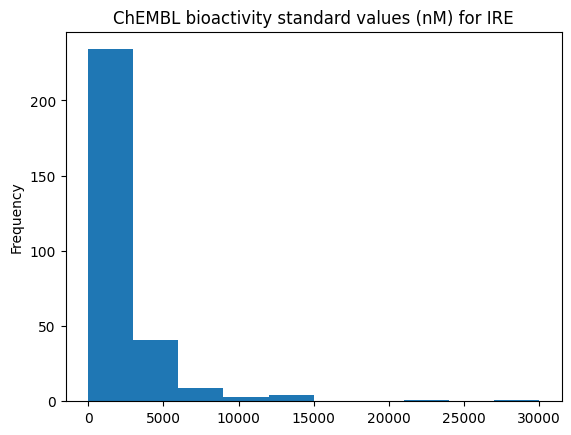

In [35]:
bioactivities["ligand.bioactivity_standard_value"].plot(
    kind="hist", title=f"ChEMBL bioactivity standard values (nM) for {ligand_expo_id}"
);

We can see that there are many measurements with high bioactivity (low values) and some with no bioactivity (high values).
We know that the intended target (on-target) of Gefitinib is EGFR (also called epidermal growth factor receptor erbB1). It would be interesting to see if there are other kinases that have been shown to bind Gefitinib strongly (off-targets). Such off-targets are often the reason for side effects of drugs.

In order to find off-targets based on the ChEMBL profiling data at hand, we filter our bioactivity dataset only for measurements showing high activity using the cutoff `activity_cutoff` and we will print out all measurements for targets that are not EGFR, i.e. potential off-targets.

In [ ]:
ACTIVITY_CUTOFF = 100
bioactivities_active = bioactivities[
    bioactivities["ligand.bioactivity_standard_value"] < ACTIVITY_CUTOFF
]
display(Markdown("Number of measurements with high activity per kinase:"))
n_bioactivities_per_target = (
    bioactivities_active.groupby("kinase.pref_name").size().sort_values(ascending=True)
)
n_bioactivities_per_target

In [ ]:
display(Markdown(f"Off-targets of {ligand_expo_id} based on profiling data:"))
bioactivities_active[
    bioactivities_active["kinase.pref_name"] != "Epidermal growth factor receptor erbB1"
].sort_values(["ligand.bioactivity_standard_value"])

Let's take a look at the off-targets and see if we can rationalize our results from a kinase similarity point of view (similar kinases are likely to bind the same ligand) - we will focus on sequence similarity (aka kinase groups and families) for now.

The off-target list contains closely related kinases:

- from the tyrosine kinase (TK) group, to which EGFR itself belongs: e.g. ErbB2 (another member of the EGFR family) and VEGFR/KDR
- from the related tyrosine-like kinase (TKL) group: e.g. RIPK2 and IRAK1

We also find the GAK kinase, which belongs to the atypical kinases and might not be an obvious off-target when only looking at sequence similarity, but it is another well-known and reported off-target. This is a nice example of how sequence is not the only indicator of protein similarity but that structural similarity plays a very important role as well.

Check out [**Part_7**](https://www.youtube.com/watch?v=hAWv1gf9DaY) for more details on binding site similarity and off-target prediction.

### Explore a random kinase in KLIFS

This section is intended to quickly explore the resources on different kinases in KLIFS.

First, we define a function that allows us to return (a) all structure-bound ligands in KLIFS plus (b) one random structure for a random kinase or given kinase(s).

In [38]:
def get_random_kinase_structure_with_ligand_information(*kinase_names, seed=None):
    """
    Get one example structure (complex and protein structural data) for one or more kinases
    plus the SMILES of all bound ligands.

    Parameters
    ----------
    *kinase_names : str
        Kinase names.
    seed : int, array-like, BitGenerator, np.random.RandomState
        Seed for random number generator. Default is None.

    Returns
    -------
    molcomplex : str
        Complex structural data.
    protein : str
        Protein structural data.
    ligands : list of str
        List of ligand SMILES.
    """
    # Get all structures for a given kinase
    if kinase_names:
        kinase_names = list(kinase_names)
        try:
            structures = session.structures.by_kinase_name(list(kinase_names))
        except ValueError:
            raise ValueError(f"The input kinase(s) {kinase_names} yielded no results.")
    # Or get all available structures
    else:
        structures = session.structures.all_structures()
    kinase_klifs_ids = [int(i) for i in structures["kinase.klifs_id"].unique()]
    # Choose random structure and corresponding kinase
    structure = structures.sample(random_state=seed).squeeze()
    structure_klifs_id = structure["structure.klifs_id"]
    kinase_klifs_id = structure["kinase.klifs_id"]
    display(Markdown(f"Selected kinases: {structure['kinase.klifs_name']}"))
    # Get complex structural data
    molcomplex = (
        KLIFS_CLIENT.Structures.get_structure_get_pdb_complex(structure_ID=structure_klifs_id)
        .response()
        .result
    )
    # Get protein structural data
    protein = (
        KLIFS_CLIENT.Structures.get_structure_get_protein(structure_ID=structure_klifs_id)
        .response()
        .result
    )
    # Get all ligands bound to all structures for input kinases
    ligands = KLIFS_CLIENT.Ligands.get_ligands_list(kinase_ID=[kinase_klifs_id]).response().result
    display(
        Markdown(
            f"Chosen KLIFS entry: PDB ID {structure['structure.pdb_id']} "
            f"with chain {structure['structure.chain'] if structure['structure.chain'] else '-'} and "
            f"alternate model {structure['structure.alternate_model'] if structure['structure.alternate_model'] else '-'} "
            f"({structure['species.klifs'].lower()}).\n\n"
            f"Number of structure-bound ligands: {len(ligands)}"
        )
    )
    return molcomplex, protein, [ligand.SMILES for ligand in ligands]

Second, we use the function to get data on a random kinase. _Note_: You can specify one or more kinases of your choice to narrow down the search space if you want, see `random_kinase_structure(*kinase_names)`.

In [ ]:
# We are setting a seed here for reproducible results
# Remove the seed to explore random kinases
molcomplex, protein, ligands = get_random_kinase_structure_with_ligand_information(seed=1)

In [ ]:
show_ligands(ligands[:10])

In [ ]:
v = show_molecule(molcomplex, "pdb")
v

In [ ]:
v.render_image();

In [ ]:
v._display_image()

## Discussion

In this talktorial, we have explored how to interact with the rich kinase resource KLIFS using (a) the KLIFS OpenAPI and (b) the KLIFS-dedicated module in `opencadd`. First, we have used the kinase EGFR to extract all available ligand-bound structures and their KLIFS interaction fingerprints, which were used to extract key hydrogen bonding residues. Second, we fetched profiling data for Gefitinib to investigate EGFR off-targets.